<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/modelo_classificacao_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens usando CNN

Objetivo: Criar um modelo de classificação de imagens com arquitetura CNN <br>
Cenário: Uma empresa de tecnologia que deseja desenvolver um modelo de inteligência artificial capaz de classificar imagens em 10 categorias diferentes. A empresa está interessada em usar Redes Neurais Convolucionais (CNN) para essa tarefa, pois elas têm se mostrado muito eficazes em problemas de visão computacional.
O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas de 32x32 pixels, divididas em 10 classes: avião, automóvel, pássaro, gato, veado, cão, sapo, cavalo, navio e caminhão.

In [1]:
# importação da biblioteca
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
# carregando o conjunto de dados CIFAR-10 e visualizzar algumas imagens
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cão', 'sapo', 'cavalo', 'navio', 'caminhão']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


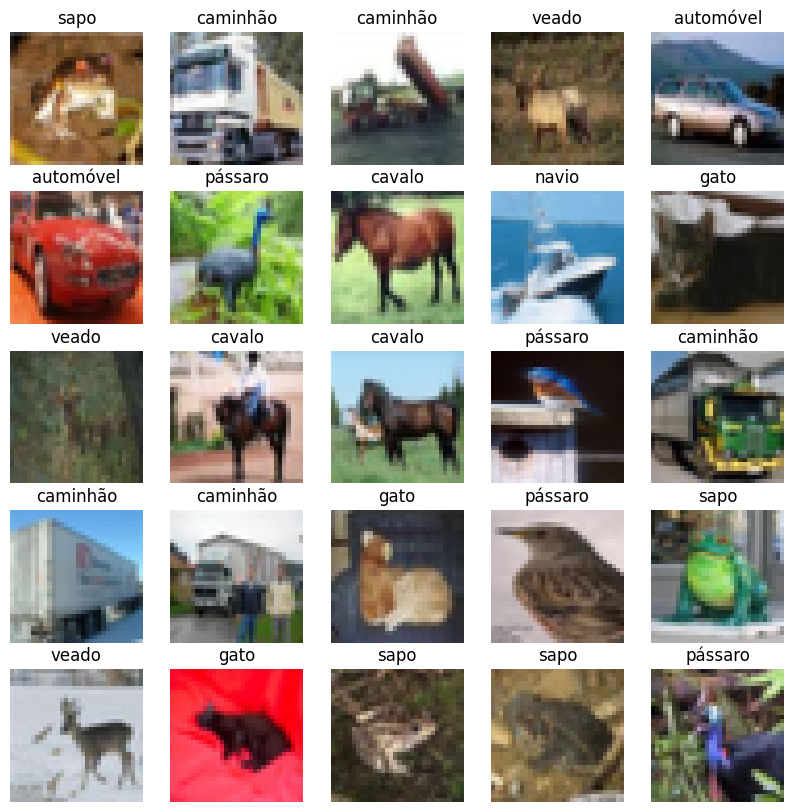

In [6]:
# visualizar algumas imagens
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')
plt.show()

In [7]:
# pré-processar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
# construindo e treinando a CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.3213 - loss: 1.8179 - val_accuracy: 0.5512 - val_loss: 1.2659
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.5572 - loss: 1.2525 - val_accuracy: 0.6040 - val_loss: 1.0986
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.6210 - loss: 1.0799 - val_accuracy: 0.6450 - val_loss: 1.0182
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.6610 - loss: 0.9575 - val_accuracy: 0.6696 - val_loss: 0.9546
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6914 - loss: 0.8795 - val_accuracy: 0.6672 - val_loss: 0.9684
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.7086 - loss: 0.8270 - val_accuracy: 0.6916 - val_loss: 0.8851
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.7282 - loss: 0.7709 - val_accuracy: 0.7058 - val_loss: 0.8647
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.7447 -

In [11]:
# avaliando o modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Acurácia no conjunto de teste:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7043 - loss: 0.8909
Acurácia no conjunto de teste: 0.7019000053405762


In [12]:
# fazer previsões em novas imagens
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Rótulos reais:", true_labels)
print("Rótulos previstos:", predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Rótulos reais: [3 8 8 0 6]
Rótulos previstos: [3 8 8 0 6]
